In [1]:
!wget https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/preprocess.py
import preprocess
import re
import pandas as pd

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

def plotWordCloud(wordcloud):
  plt.figure(figsize=[15,10])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

--2022-10-15 03:35:32--  https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1461 (1.4K) [text/plain]
Saving to: ‘preprocess.py’

preprocess.py       100%[===================>]   1.43K  --.-KB/s    in 0s      

2022-10-15 03:35:33 (31.8 MB/s) - ‘preprocess.py’ saved [1461/1461]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
text = "How are you, Tom? How many works do you have to work?"
print(preprocess._removeSymbols(text))

How are you  Tom  How many works do you have to work 


In [3]:
text = "How are you, Tom? How many works do you have to work?"
print(text.lower())

how are you, tom? how many works do you have to work?


In [4]:
text = "How are you, Tom? How many works do you have to work?"
print(preprocess._stem(text))

How are you, Tom? How many work do you have to work?


In [5]:
# Stemming by PorterStemmer
# https://www.nltk.org/_modules/nltk/stem/porter.html

s = PorterStemmer()
print(s.stem('Having'))
print(s.stem('Have'))
print(s.stem('Had'))

print(s.stem('Fishing'))
print(s.stem('Fish'))
print(s.stem('Fisher'))
print(s.stem('Fishes'))
print(s.stem('Fished'))

print(s.stem('am'))
print(s.stem('is'))
print(s.stem('was'))

have
have
had
fish
fish
fisher
fish
fish
am
is
wa


In [6]:
# Lemmatization by WordNet
# Lemmatization is the process of converting a word to its base form. 
# Lemmatization considers the context and converts the word to its meaningful base form, 
# whereas stemming just removes the last few characters
# Sometimes the same word can have multiple different lemmas. 
# Based on the context (by POS tag), extract the appropriate lemma.

s = WordNetLemmatizer()
print(s.lemmatize('having', pos='v'))
print(s.lemmatize('have', pos='v'))
print(s.lemmatize('had', pos='v'))

print(s.lemmatize('fishing', pos='v'))
print(s.lemmatize('fish', pos='v'))
print(s.lemmatize('fisher', pos='n'))
print(s.lemmatize('fishes', pos='v'))
print(s.lemmatize('fished', pos='v'))

print(s.lemmatize('am', pos='v'))
print(s.lemmatize('is', pos='v'))
print(s.lemmatize('was', pos='v'))

have
have
have
fish
fish
fisher
fish
fish
be
be
be


In [7]:
text = "How are you, Tom? How many works do you have to work?"
print(preprocess._stop(text))

How you, Tom? How many works work?


In [8]:
preprocess.stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
text = "How are you, Tom? How many works do you have to work?"
print(preprocess.process(text))

tom many work work


In [10]:
# Segment Chinese sentence into words
import jieba

In [11]:
seg_list = jieba.cut("兒子生性病母倍感安慰")
print("/".join(seg_list))  

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.985 seconds.
DEBUG:jieba:Loading model cost 0.985 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


兒子生/性病/母/倍感/安慰


In [12]:
seg_list = jieba.cut("白石角新發展區位於沙田與大埔之間，2012年起發展成住宅區，多個樓盤如天賦海灣、逸瓏灣、海日灣及朗濤等相繼落成及入伙")
print("/".join(seg_list))  

白石/角新/發展/區位/於/沙田/與/大埔/之間/，/2012/年/起/發展/成/住宅/區/，/多個/樓盤/如天/賦海灣/、/逸瓏灣/、/海日灣/及朗濤/等/相繼/落成/及/入伙


In [13]:
seg_list = jieba.cut("雷军称不送充电器创意是他首创的，不是抄苹果")
print("/".join(seg_list)) 

雷军/称/不/送/充电器/创意/是/他/首创/的/，/不是/抄/苹果


In [14]:
# Install the cantonese
!pip install pycantonese

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 5.2 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 


In [15]:
import pycantonese as pc

pc.segment("兒子生性病母倍感安慰")

['兒子', '生性', '病', '母', '倍感', '安慰']

In [16]:
# Combine English words to phrases
from gensim.models.phrases import Phrases, Phraser

documents = [
    "the cheif executive officer of new york was there", 
    "machine learning can be useful sometimes",
    "new york cheif executive officer was present",
    "machine learning is good"
]

sentence_stream = [doc.split(" ") for doc in documents]

In [17]:
bigram = Phraser(Phrases(sentence_stream, min_count=1, threshold=2))

for sent in bigram[sentence_stream]:
    print(sent)

['the', 'cheif_executive', 'officer', 'of', 'new_york', 'was', 'there']
['machine_learning', 'can', 'be', 'useful', 'sometimes']
['new_york', 'cheif_executive', 'officer', 'was', 'present']
['machine_learning', 'is', 'good']


In [18]:
trigram = Phraser(Phrases(bigram[sentence_stream], min_count=1, threshold=2))

for sent in trigram[bigram[sentence_stream]]:
    print(sent)

['the', 'cheif_executive_officer', 'of', 'new_york', 'was', 'there']
['machine_learning', 'can', 'be', 'useful', 'sometimes']
['new_york', 'cheif_executive_officer', 'was', 'present']
['machine_learning', 'is', 'good']


In [19]:
# Use TextBlob (an NLP libaray) to extract the phrase directly
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
blob = TextBlob(". ".join(documents))
blob.noun_phrases

WordList(['cheif executive officer', 'new york', 'machine learning', 'new york cheif executive officer', 'machine learning'])

In [22]:
# Generate word cloud from Apple Tweets
url = 'https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/data/appleTweets.xlsx'
appleTweets = pd.read_excel(url)
appleTweets

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Country,Place (as appears on Bio),Followers,Following,Listed,Tweet language (ISO 639-1),Is a RT,User Mentions,Hashtags,Symbols
0,726561352882524160,2016-04-30,23:58,Warren of Wall St,WarrenofWallSt,Warren is the @SimplyWallSt mascot who helps y...,$AAPL management and CEO infographic https://t...,1.0,1.0,NaN,NaN,375.0,431.0,29.0,en,False,NaN,NaN,$AAPL
1,726560818683215872,2016-04-30,23:56,AlejandroMasari,AlejandroDinero,Passionate about coaching & teaching clients h...,the criminal media does fools investors once a...,NaN,1.0,CA,Canada,545.0,771.0,27.0,en,False,NaN,NaN,"$aapl,$spy,$qqq"
2,726560521076396032,2016-04-30,23:55,Cody Freeman,ZenTrends,NaN,@rpatel83 ha it's ok. I've been very clear sin...,NaN,NaN,NaN,NaN,1058.0,170.0,67.0,en,False,@RPatel83,NaN,$AAPL
3,726559661718179844,2016-04-30,23:51,FinBuzz,PortfolioBuzz,"Financial #bigdata crowd-sourced, crowd-curate...",Monitor your watchlist of assets for tweets - ...,NaN,NaN,GB,London,817.0,885.0,267.0,en,False,NaN,NaN,"$AAPL,$GOOGL,$MSFT,$FB,$TWTR"
4,726559467353964545,2016-04-30,23:50,Taylor,Trading_Analyst,-------- CMT Level II Candidate ------- The m...,{NEW POST} ANALYSIS + TRADE IDEAS: $AAPL $TSLA...,NaN,NaN,NaN,NaN,1785.0,22.0,56.0,en,False,NaN,NaN,"$AAPL,$TSLA,$AMZN,$NFLX,$GPRO,$TWTR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74796,716328052892897280,2016-04-02,18:14,Daniel,LeRatton,~ Tucson #WankPuffin,“And in a world where you get a huge cheer fro...,NaN,NaN,NaN,NaN,1602.0,2029.0,108.0,en,False,NaN,NaN,$AAPL
74797,716327961641680898,2016-04-02,18:14,Computer News,computer_hware,Track all of the latest Computer News with Owl...,Why Intel Is Supporting #Apple's iPhone 7. Rea...,NaN,NaN,NaN,NaN,24.0,2.0,38.0,en,False,NaN,#Apple,$AAPL
74798,716327961641639937,2016-04-02,18:14,Peripheral News,_peripherals,Track all of the latest Peripheral News with O...,Why Intel Is Supporting #Apple's iPhone 7. Rea...,NaN,NaN,NaN,NaN,27.0,3.0,38.0,en,False,NaN,#Apple,$AAPL
74799,716326132476461058,2016-04-02,18:07,Baylee Pulliam,BayleePulliam,#Writer. #Ideator. #Digital Native. Would beat...,Here's why #Apple is flying a pirate flag to c...,NaN,NaN,US,"Louisville, Kentucky",1836.0,967.0,293.0,en,False,NaN,#Apple,$AAPL


In [23]:
cols = ['Tweet content']
appleTweets[cols][:1000]

,Tweet content
0,$AAPL management and CEO infographic https://t...
1,the criminal media does fools investors once a...
2,@rpatel83 ha it's ok. I've been very clear sin...
3,Monitor your watchlist of assets for tweets - ...
4,{NEW POST} ANALYSIS + TRADE IDEAS: $AAPL $TSLA...
...,...
995,RT @ValaAfshar: Apple has $233 billion in cash...
996,RT @ValaAfshar: Apple has $233 billion in cash...
997,Something Is Very Wrong With Apples iPad -- T...
998,RT @ValaAfshar: Apple has $233 billion in cash...


In [24]:
text = " ".join(words for words in appleTweets['Tweet content'])
text[:5000]

'$AAPL management and CEO infographic https://t.co/HnAKJ4E7K1 https://t.co/K1ARI2Yn31 the criminal media does fools investors once again! $aapl $spy $qqq https://t.co/eB1cheQXc5 backtesting the media https://t.co/VrbjOuap5K @rpatel83 ha it\'s ok. I\'ve been very clear since 7/31/15 that $AAPL is a sell. Got plenty of evidence for haters Monitor your watchlist of assets for tweets - US Tech Giants https://t.co/J74uV6qAnD $AAPL $GOOGL $MSFT $FB $TWTR {NEW POST} ANALYSIS + TRADE IDEAS: $AAPL $TSLA $AMZN $NFLX $GPRO $TWTR - click the link &gt; https://t.co/wAW7tvAACf https://t.co/pOICvIS1pj RT @BrianDColwell: #VirtualReality: The Next #3DPrinting? https://t.co/wTb3BhxrD5  $AAPL $FB $GOOG $MSFT $SNE $LNVGY $SSYS #VR #disruptivet… $AAPL Monthly line chart. Lowest monthly close in last 18-months. I\'m sure its nothing. https://t.co/lJ62lrTt3y Have we reached peak Apple? https://t.co/8q6pjq7mmZ $AAPL $AAPL Technical Analysis Video. 4/29/2016 https://t.co/fPx9TLWQyV Fous4x2 #daytrading DVD revi

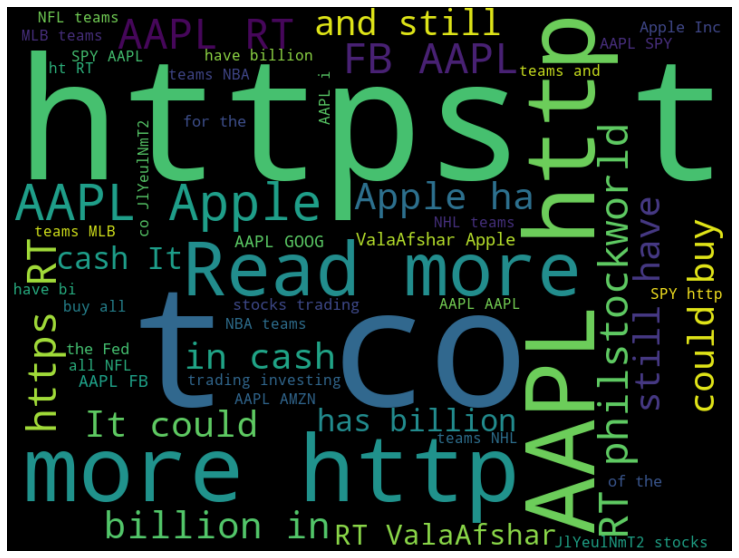

In [25]:
# Word cloud
MAX_WORDS = 50
WIDTH, HEIGHT = 800, 600
BG_COLOR = "black" # white

plotWordCloud(WordCloud(max_words=MAX_WORDS, width=WIDTH, height=HEIGHT, stopwords='', background_color=BG_COLOR).generate(text))

In [26]:
# Count Duplicates 
print('Duplicate content count=', appleTweets[['Tweet content']].duplicated().sum())

# Remove duplicate
print("Original row# :", appleTweets.shape[0])
appleTweets = appleTweets.drop_duplicates(subset='Tweet content', keep='first')
print("Row after removed duplicates# :", appleTweets.shape[0])

Duplicate content count= 23712
Original row# : 74801
Row after removed duplicates# : 51089


In [27]:
appleTweets['cleaned'] = appleTweets['Tweet content'].apply(preprocess.process)
appleTweets[['Tweet content', 'cleaned']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Tweet content,cleaned
0,$AAPL management and CEO infographic https://t...,aapl management ceo infographic http co hnakj4...
1,the criminal media does fools investors once a...,criminal medium doe fool investor aapl spy qqq...
2,@rpatel83 ha it's ok. I've been very clear sin...,rpatel83 ha ok clear since aapl sell got plent...
3,Monitor your watchlist of assets for tweets - ...,monitor watchlist asset tweet tech giant http ...
4,{NEW POST} ANALYSIS + TRADE IDEAS: $AAPL $TSLA...,new post analysis trade idea aapl tsla amzn nf...
...,...,...
74796,“And in a world where you get a huge cheer fro...,world get huge cheer audience announced nylon ...
74797,Why Intel Is Supporting #Apple's iPhone 7. Rea...,intel supporting apple iphone read http co pdv...
74798,Why Intel Is Supporting #Apple's iPhone 7. Rea...,intel supporting apple iphone read http co t22...
74799,Here's why #Apple is flying a pirate flag to c...,apple flying pirate flag celebrate 40th annive...


In [28]:
cleaned_text = " ".join(words for words in appleTweets['cleaned'])
cleaned_text[:5000]

'aapl management ceo infographic http co hnakj4e7k1 http co k1ari2yn31 criminal medium doe fool investor aapl spy qqq http co eb1cheqxc5 backtesting medium http co vrbjouap5k rpatel83 ha ok clear since aapl sell got plenty evidence hater monitor watchlist asset tweet tech giant http co j74uv6qand aapl googl msft fb twtr new post analysis trade idea aapl tsla amzn nflx gpro twtr click link gt http co waw7tvaacf http co poicvis1pj rt briandcolwell virtualreality next 3dprinting http co wtb3bhxrd5 aapl fb goog msft sne lnvgy ssys vr disruptivet aapl monthly line chart lowest monthly close last month sure nothing http co lj62lrtt3y reached peak apple http co 8q6pjq7mmz aapl aapl technical analysis video http co fpx9tlwqyv fous4x2 daytrading dvd review http co kxr2oivquu aapl fxcm himx asp aal aapl technical analysis video http co zfb95sva1c iwv_farm_market see aapl would steal patently apple transcript opening statement apple q2 conference call http co ywzm15razt patentlyapple aapl aapl an

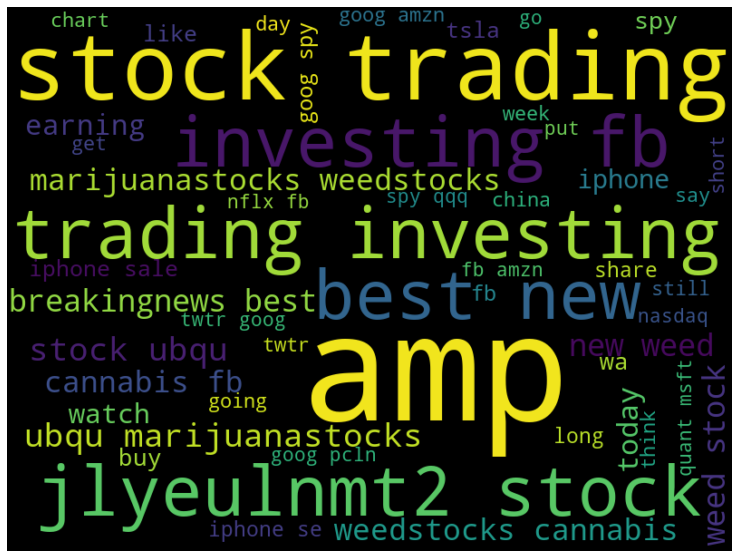

In [29]:
# application level stop words
STOP_WORDS = ['apple', 'aapl', 'http', 'co', 'inc', 'read', 'ha', 'u2026', 'nhttp', 'rt', 'nhttps']
cleanedCloud = WordCloud(max_words=MAX_WORDS, width=WIDTH, height=HEIGHT, stopwords=STOP_WORDS, background_color=BG_COLOR).generate(cleaned_text)
plotWordCloud(cleanedCloud)

In [30]:
# Save the word cloud to a file
cleanedCloud.to_file("wordcloud.png")

In [31]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
?WordCloud

In [32]:
# Remove the unsupported characters and save to a file
appleTweets = appleTweets.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)
appleTweets.to_excel('appleTweetsCleaned.xlsx')